In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача классификации

## Подготовка данных

In [48]:
df_r = pd.read_csv('../data/classification/responses_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор лейблов из датасета
X = df_r.drop(['Gender_male', 'Gender_nan'], axis=1)
y = df_r['Gender_male']
X

Age  Height  Weight  Number of siblings  Music_2.0  Music_3.0  \
0     20.0   163.0    48.0                 1.0          0          0   
1     19.0   163.0    58.0                 2.0          0          0   
2     20.0   176.0    67.0                 2.0          0          0   
3     22.0   172.0    59.0                 1.0          0          0   
4     20.0   170.0    59.0                 1.0          0          0   
...    ...     ...     ...                 ...        ...        ...   
999   19.0   181.0    70.0                 1.0          0          0   
1000  16.0   153.0    62.0                 1.0          0          0   
1001  18.0   160.0    63.0                 2.0          0          0   
1002  22.0   181.0    72.0                 1.0          0          0   
1003  20.0   172.0    63.0                 1.0          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   
1001               0                       0                   0   
1002               0   

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:4])
X.iloc[:,:4] = pd.DataFrame(sc.transform(X.iloc[:,:4]))
X

Age    Height    Weight  Number of siblings  Music_2.0  Music_3.0  \
0    -0.146449 -1.061308 -1.345288           -0.294128          0          0   
1    -0.504197 -1.061308 -0.614248            0.703523          0          0   
2    -0.146449  0.249956  0.043688            0.703523          0          0   
3     0.569047 -0.153510 -0.541144           -0.294128          0          0   
4    -0.146449 -0.355243 -0.541144           -0.294128          0          0   
...        ...       ...       ...                 ...        ...        ...   
999  -0.504197  0.754288  0.263000           -0.294128          0          0   
1000 -1.577441 -2.069972 -0.321832           -0.294128          0          0   
1001 -0.861945 -1.363907 -0.248728            0.703523          0          0   
1002  0.569047  0.754288  0.409208           -0.294128          0          0   
1003 -0.146449 -0.153510 -0.248728           -0.294128          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   

In [50]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Разделяем данные на обучение и тест с сохранением соотношения классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([273, 399])
dict_values([197, 135])


## Построение модели

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

In [52]:
%%time
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train, plot=False, verbose=0)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188   9]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       197
           1       0.93      0.92      0.93       135

    accuracy                           0.94       332
   macro avg       0.94      0.94      0.94       332
weighted avg       0.94      0.94      0.94       332

Wall time: 11.1 s


# Задача регрессии

## Подготовка данных

In [53]:
df_r = pd.read_csv('../data/regression/avocado_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор целевый значений из датасета
X = df_r.drop(['y', 'date'], axis=1)
y = df_r['y']
X

total_volume     4046       4225    4770  total_bags  small_bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0           93.25          0.0  2015     12  ...                    0   
1           97.49          0.0  2015     12  ...                    0   
2          103.14          0.0  2015     12  ...                    0   
3          133.76          0.0  2015     12  ...                    0   
4          197.69          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244      431.85          0.0  2018      2  ...                    0   
18245      324.80          0.0  2018      1  ...                    0   
18246       42.31          0.0  2018      1  ...                    0   
18247       50.00          0.0  2018      1  ...                    0   
18248       26.01          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:7])
X.iloc[:,:7] = pd.DataFrame(sc.transform(X.iloc[:,:7]))
X

total_volume      4046      4225      4770  total_bags  small_bags  \
0         -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   -0.232647   
1         -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   -0.231568   
2         -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   -0.233399   
3         -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   -0.236568   
4         -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   -0.236154   
...             ...       ...       ...       ...         ...         ...   
18244     -0.241373 -0.230017 -0.243857 -0.212540   -0.229301   -0.226665   
18245     -0.242296 -0.230693 -0.242277 -0.212540   -0.233594   -0.232196   
18246     -0.242331 -0.230693 -0.243090 -0.205766   -0.233463   -0.231644   
18247     -0.241625 -0.230428 -0.242651 -0.205774   -0.231866   -0.229543   
18248     -0.241253 -0.229347 -0.243170 -0.210450   -0.230807   -0.228111   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0       -0.222352          0.0  2015     12  ...                    0   
1       -0.222335          0.0  2015     12  ...                    0   
2       -0.222311          0.0  2015     12  ...                    0   
3       -0.222186          0.0  2015     12  ...                    0   
4       -0.221924          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244   -0.220964          0.0  2018      2  ...                    0   
18245   -0.221403          0.0  2018      1  ...                    0   
18246   -0.222561          0.0  2018      1  ...                    0   
18247   -0.222529          0.0  2018      1  ...                    0   
18248   -0.222628          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [55]:
from sklearn.model_selection import train_test_split
test_size=0.30
train_inx  = round(len(X) * (1 - test_size))
# Разделяем данные на обучение и тест в соотношении 70%\30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
# Если пробовать разбивать с сохранением по дате, то результаты будут заметно хуже
# X_train, X_test, y_train, y_test = X[:train_inx], X[train_inx:], y[:train_inx], y[train_inx:]

## Построение модели

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor

def root_mean_square_error(y_true, y_test_pred):
    return np.sqrt(mean_squared_error(y_true, y_test_pred))

def print_metrics(y_true, y_test_pred):
    print(f'R^2 {r2_score(y_true, y_test_pred)}')
    print(f'MSE {mean_squared_error(y_true, y_test_pred)}')
    print(f'RMSE {root_mean_square_error(y_true, y_test_pred)}')
    print(f'MAE {mean_absolute_error(y_true, y_test_pred)}')


def plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели "{model_name}"')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.scatter(y_train_pred, y_train, alpha=0.5, color = 'red')
    plt.scatter(y_test_pred, y_test, alpha=0.5, color = 'blue')
    plt.title(model_name)


In [57]:
%%time
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train, plot=False, verbose=0)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print(print_metrics(y_test, y_test_pred))

R^2 0.9060606776980045
MSE 0.01531518305795893
RMSE 0.12375452742408631
MAE 0.09017933917167432
None
Wall time: 10.5 s


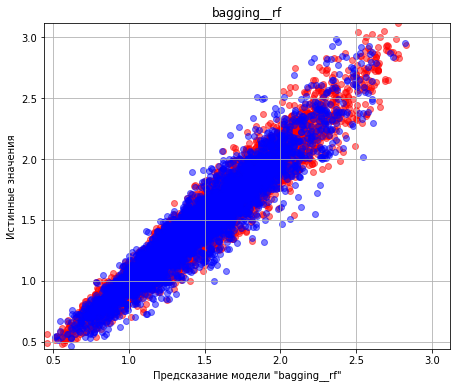

In [58]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__rf' );

